  TransactionID CustomerID CustomerDOB CustGender CustLocation  \
0            T1   C5841053     10/1/94          F   JAMSHEDPUR   
1            T2   C2142763      4/4/57          M      JHAJJAR   
2            T3   C4417068    26/11/96          F       MUMBAI   
3            T4   C5342380     14/9/73          F       MUMBAI   
4            T5   C9031234     24/3/88          F  NAVI MUMBAI   

   CustAccountBalance TransactionDate  TransactionTime  \
0            17819.05          2/8/16         143207.0   
1             2270.69          2/8/16         141858.0   
2            17874.44          2/8/16         142712.0   
3           866503.21          2/8/16         142714.0   
4             6714.43          2/8/16         181156.0   

   TransactionAmount (INR)  
0                     25.0  
1                  27999.0  
2                    459.0  
3                   2060.0  
4                   1762.5  
TransactionID                0
CustomerID                   0
CustomerDOB       

<ipython-input-3-b52d3d2c00b9>:22: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
<ipython-input-3-b52d3d2c00b9>:24: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['CustomerDOB'] = pd.to_datetime(df['CustomerDOB'])


Columns in the dataset: Index(['TransactionID', 'CustomerID', 'CustomerDOB', 'CustGender',
       'CustLocation', 'CustAccountBalance', 'TransactionDate',
       'TransactionTime', 'TransactionAmount (INR)'],
      dtype='object')
                         CustomerDOB  CustAccountBalance  \
count                         279622        2.796220e+05   
mean   1984-03-12 20:22:02.059065536        1.090334e+05   
min              1800-01-01 00:00:00        0.000000e+00   
25%              1983-09-07 00:00:00        4.545960e+03   
50%              1988-10-09 00:00:00        1.608471e+04   
75%              1992-06-09 00:00:00        5.489812e+04   
max              2073-12-31 00:00:00        1.150355e+08   
std                              NaN        6.988390e+05   

                     TransactionDate  TransactionAmount  
count                         279622      279622.000000  
mean   2016-06-20 03:23:20.722403584        1596.656074  
min              2016-01-08 00:00:00           0.00000

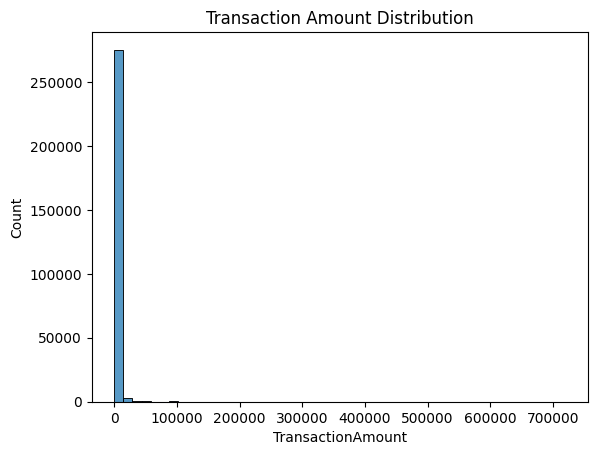

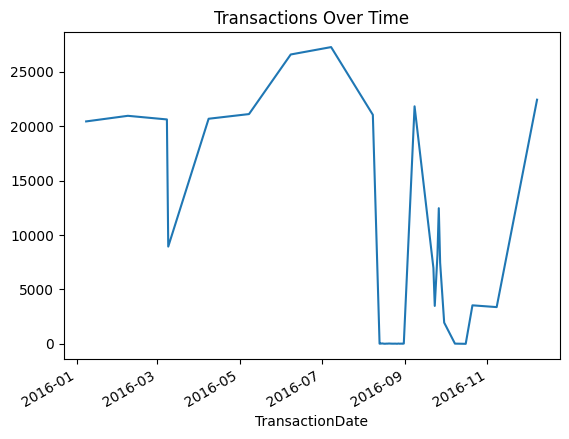

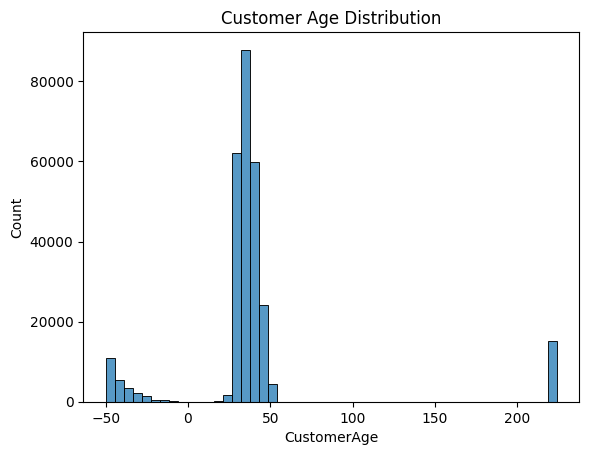

Training MSE: 39712985.910949565
Training R^2: 0.005503258872673111
Testing MSE: 33585187.825541355
Testing R^2: 0.008050004155760515


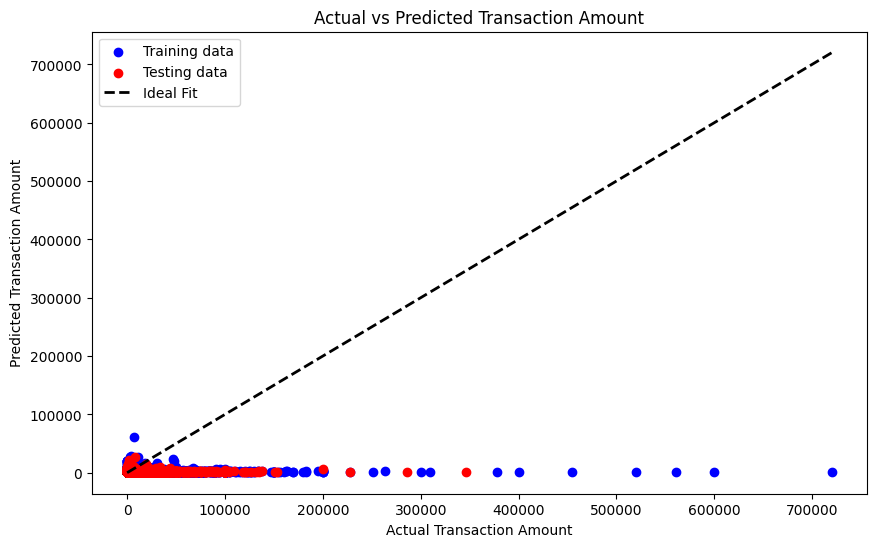

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset

df = pd.read_csv('bank_transactions.csv')

# Display the first few rows of the dataset
print(df.head())

# Step 2: Data Cleaning
print(df.isnull().sum())
df.fillna(method='ffill', inplace=True)

# Data Types and Conversions
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['TransactionTime'] = pd.to_datetime(df['TransactionTime']).dt.time
df['CustomerDOB'] = pd.to_datetime(df['CustomerDOB'])

# Verify column names
print("Columns in the dataset:", df.columns)

# Check if 'TransactionAmount' exists
if 'TransactionAmount (INR)' in df.columns:
    df.rename(columns={'TransactionAmount (INR)': 'TransactionAmount'}, inplace=True)
elif 'TransactionAmount' not in df.columns:
    raise KeyError("The dataset does not contain a 'TransactionAmount' column. Please check the column names.")

# Step 3: Exploratory Data Analysis (EDA)
print(df.describe())

# Transaction Amount Distribution
sns.histplot(df['TransactionAmount'], bins=50)
plt.title('Transaction Amount Distribution')
plt.show()

# Transactions over Time
df['TransactionDate'].value_counts().sort_index().plot()
plt.title('Transactions Over Time')
plt.show()

# Customer Age Distribution
df['CustomerAge'] = (pd.to_datetime('today') - df['CustomerDOB']).dt.days // 365
sns.histplot(df['CustomerAge'], bins=50)
plt.title('Customer Age Distribution')
plt.show()

# Step 4: Feature Engineering
df['TransactionYear'] = df['TransactionDate'].dt.year
df['TransactionMonth'] = df['TransactionDate'].dt.month
df['TransactionDay'] = df['TransactionDate'].dt.day
df['TransactionWeekday'] = df['TransactionDate'].dt.weekday

# Encode Categorical Variables
label_encoder = LabelEncoder()
df['CustGender'] = label_encoder.fit_transform(df['CustGender'])
df['CustLocation'] = label_encoder.fit_transform(df['CustLocation'])

# Step 5: Prepare Features and Target
X = df.drop(['TransactionID', 'CustomerID', 'CustomerDOB', 'TransactionDate', 'TransactionTime', 'TransactionAmount'], axis=1)
y = df['TransactionAmount']

# Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 6: Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Make Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Step 7: Evaluate the Model
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f'Training MSE: {mse_train}')
print(f'Training R^2: {r2_train}')
print(f'Testing MSE: {mse_test}')
print(f'Testing R^2: {r2_test}')

# Visualization of Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, color='blue', label='Training data')
plt.scatter(y_test, y_test_pred, color='red', label='Testing data')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2, label='Ideal Fit')
plt.xlabel('Actual Transaction Amount')
plt.ylabel('Predicted Transaction Amount')
plt.title('Actual vs Predicted Transaction Amount')
plt.legend()
plt.show()
